# Distribuições de probabilidade

<br>
<img src="img/distribuicoes_prob.png">
<br>

*fonte:Wikipedia*

Em teoria da probabilidade e em estatística, uma distribuição de probabilidade descreve o comportamento aleatório de um fenômeno dependente do acaso. O estudo dos fenômenos aleatórios começou com o estudo dos jogos de azar – jogos de dados, sorteios de bolas de urna e cara ou coroa eram motivações para compreender e prever os experimentos aleatórios. Essas abordagens iniciais são fenômenos discretos, o que significa que o número de resultados possíveis é finito ou contável. Entretanto, certas questões revelam distribuições de probabilidade com suporte infinito não contável. Por exemplo, quando o lançamento de uma moeda tende ao infinito, o número de coroas aproxima-se de uma distribuição normal.

Flutuações e variabilidade estão presentes em quase todo valor que pode ser medido durante a observação de um fenômeno, independente de sua natureza, além disso quase todas as medidas possuem uma parte de erro intrínseco. A distribuição de probabilidade pode modelar incertezas e descrever fenômenos físicos, biológicos, econômicos, entre outros. O domínio da estatística permite o encontro das distribuições de probabilidade adaptadas aos fenômenos aleatórios.

Há muitas distribuições de probabilidade diferentes. Entre as distribuições de probabilidade, a distribuição normal tem uma importância particular. De acordo com o teorema central do limite, a distribuição normal aborda o comportamento assintótico de várias distribuições de probabilidade.

O conceito de distribuição de probabilidade é formalizado matematicamente pela teoria da medida – uma distribuição de probabilidade é uma medida muitas vezes vista como uma distribuição que descreve o comportamento de uma variável aleatória discreta ou contínua. Uma medida é uma distribuição de probabilidade se sua massa total for 1. O estudo de uma variável aleatória de acordo com uma distribuição de probabilidade discreta revela o cálculo de somas e de séries, enquanto que o estudo de uma variável aleatória de acordo com uma distribuição de probabilidade absolutamente contínua revela o cálculo de integrais. As funções particulares permitem caracterizar as distribuições de probabilidade como a função de distribuição e a função característica. 

# Amostras para distribuições com numpy e scipy

A biblioteca  numpy oferece um conjunto de funções que geram valores aleatórios, esses valores podem vir de diferentes tipos de distribuições estatísticas e nos fornecem um conjunto de dados pertencentes aos valores do espaço de amostra dessas distribuições.

Na prática, se precisássemos de um conjunto de 100 dados que sigam uma distribuição normal, teríamos que fazer uma chamada para a função normal indicando a média e o desvio padrão:

```python
    >> media = 0
    >> desvio = 1
    >> numpy.random.normal(media, desvio, 100)
```

Vamos trabalhar com dados de diferentes distribuições (dados por numpy.random) para visualizar o comportamento dessas variáveis. A quantidade de dados será grande para podermos apreciar corretamente sua forma gráfica.

É importante reconhecer visualmente o comportamento estatístico das variáveis, já que é uma primeira aproximação à modelagem e previsão desses dados. Muitas vezes é possível ter uma ideia de como eles se comportam matematicamente apenas visualizando-os em um gráfico.

Para biblioteca original [clique aqui](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Distribuição uniforme discreta
Diz-se que uma variável segue uma distribuição uniforme discreta (se escreve **_X_ ~ ** unif {$x_1, x_2, ... x_n$}) se a probabilidade de aparição dos valores em cada ensaio for constante e igual: 

\begin{equation*}
P(x_i)= \dfrac{1}{n}
\end{equation*}

Onde **_P_** é a probabilidade, **_x_** valores dentro do espaço amostral e **_n_** a quantidade de elementos do espaço amostral.

A seguir, vamos realizar uma chamada à função ```randint``` que ajusta a valores provenientes de uma distribuição uniforme discreta, com a motivação de simular o lançamento de um dado equilibrado 6000 vezes.

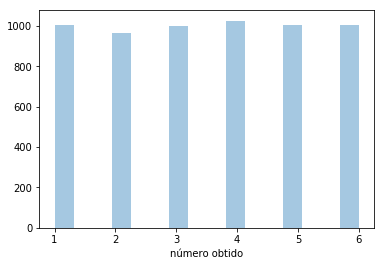

In [2]:
# Definimos o domínio do dado, onde somamos 1 ao valor máximo... por quê?
valor_min = 1
valor_max = 6 + valor_min

# Definimos a quantidade de lançamentos do dado.
lançamentos = 6000

# Fazemos uma chamada à função randint, que retorna o resultado de cada lançamento
samples_uniforme = np.random.randint(low = valor_min,
                                     high = valor_max,
                                     size = lançamentos)

# Representamos graficamente os resultados
sns.distplot(samples_uniforme, axlabel = 'número obtido', kde=False);

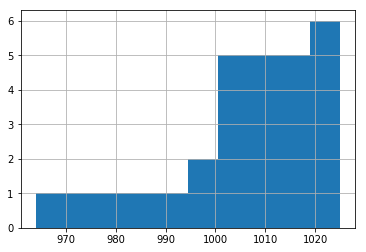

In [3]:
#distribuição acumulada
df = pd.DataFrame(samples_uniforme,columns=['face'])
df.groupby('face').size().hist(cumulative=True)

# Distribuição de Bernoulli

*fonte: Wikipedia*

Na área de teoria das probabilidades e estatística, a distribuição de Bernoulli, nome em homenagem ao cientista suíço Jakob Bernoulli, é a distribuição discreta de espaço amostral {0, 1}, que tem valor 1 com a probabilidade de sucesso p e valor 0 com a probabilidade de falha q = 1 − p. 

Um exemplo clássico de uma experiência de Bernoulli é uma jogada única de uma moeda. A moeda pode dar "coroa" com probabilidade p e "cara" com probabilidade 1 − p. A experiência é dita justa se p = 0.5, indicando a origem dessa terminologia em jogos de aposta (a aposta é justa se ambos os possíveis resultados tem a mesma probabilidade). 

A média dessa distribuição é sempre **p** e a variância **p(1-p)**.

### Exemplo

Vamos trabalhar com uma distribuição de Bernoulli, com ```p = 0.7```, e observar a convergência dos resultados conforme o tamanho da amostra é incrementado.

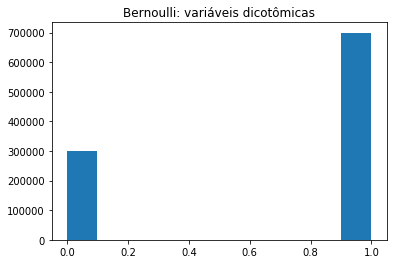

In [4]:
from scipy.stats import bernoulli
bern = bernoulli.rvs(p=0.7, size=1000000)

plt.title('Bernoulli: variáveis dicotômicas')
plt.hist(bern);

In [5]:
bern[:10]

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1])

In [6]:
bern.sum()/len(bern) # média empirica

0.699525

In [7]:
bern.std()**2 # variância

0.21018977437499994

## Simulação para convergência de Bernoulli com o aumento da amostra

In [8]:
print('Média Verdadeira: 0.7, Variância Verdadeira: 0.21')
for n in [3,10,100,1000,10000,100000,1000000,10000000]:
    bern = bernoulli.rvs(p=0.7, size=n)
    print('\namostra:',n)
    print('média:', bern.sum()/len(bern))
    print('var:', bern.std()**2)    

Média Verdadeira: 0.7, Variância Verdadeira: 0.21

amostra: 3
média: 0.6666666666666666
var: 0.2222222222222222

amostra: 10
média: 0.5
var: 0.25

amostra: 100
média: 0.62
var: 0.23560000000000006

amostra: 1000
média: 0.694
var: 0.21236400000000002

amostra: 10000
média: 0.7027
var: 0.20891271000000003

amostra: 100000
média: 0.70102
var: 0.20959095959999996

amostra: 1000000
média: 0.700078
var: 0.20996879391599998

amostra: 10000000
média: 0.7001527
var: 0.20993889668270999


# Distribuição Binomial

*fonte: Wikipedia*

Em teoria das probabilidades e estatística, a distribuição binomial é a distribuição de probabilidade discreta do número de sucessos numa sequência de n {\displaystyle n} n tentativas tais que:

- Cada tentativa tem exclusivamente como resultado duas possibilidades, sucesso ou fracasso (binomial, a que se chama de tentativa de Bernoulli), e;
- Cada tentativa é independente das demais, e;
- A probabilidade de sucesso p {\displaystyle p} p a cada tentativa permanece constante independente das demais, e;
- A variável de interesse, ou pretendida, é o número de sucessos k {\displaystyle k} k nas n {\displaystyle n} n tentativas.

Mede o número de sucessos em uma sequência de _**n**_ ensaios independentes entre si, com uma probabilidade fixa **_p_** de ocorrência de sucesso entre os ensaios. Quando uma variável **_X_** segue uma distribuição binomial, escreve-se **_X ~ B (n, p)_** . Onde **_p_** é a probabilidade de sucesso (que é fixa), y _**n**_ o número de ensaios. 

A função da probabilidade é:

\begin{equation*}
f(x)=  \binom {n}{x} (p)^x (1-p)^{(n-x)}
\end{equation*}

Onde **_x_** é a quantidade de acertos, **_p_** a probabilidade de sucesso, **_n_** a quantidade de ensaios.

### Exemplo

Neste caso, vamos simular o lançamento de uma moeda 8 vezes por ensaio, onde a probabilidade de sucesso (obter cara) será 0,5. A seguir, a função de distribuição para o caso:

\begin{equation*}
f(x)= \binom {8}{x} (0,5)^x (1-0,5)^{(8-x)}
\end{equation*}

Vamos realizar um chamado à função```binomial``` que ajusta a valores provenientes de uma distribuição binomial e vamos realizar 10.000 ensaios para montar a distribuição.

Nota: A distribuição de Bernoulli é um caso especial da distribuição Binomial, com n = 1 e sua média, como esperado é np (contra p) e a variância teórica é np(1-p) (contra p(1-p)).

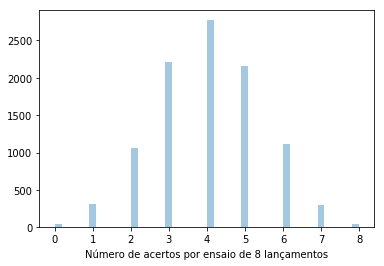

In [9]:
# definimos a quantidade de ensaios.
quantidade_ensaios = 10000

# definimos a quantidade de lançamentos por ensaio.
lançamentos = 8

# definimos a probabilidade de obter cara em cada lançamento.
probabilidade_sucesso = 0.5

# binomial retorna o número de sucessos de cada vez que se realizou um ensaio de 8 lançamentos.
samples_binomial = np.random.binomial(n = lançamentos, p = probabilidade_sucesso, size = quantidade_ensaios)

# construímos um gráfico.
eixo_x = 'Número de acertos por ensaio de 8 lançamentos'
sns.distplot(samples_binomial, axlabel = eixo_x, kde = False);

In [10]:
samples_binomial[:100]

array([4, 4, 4, 6, 2, 3, 3, 4, 6, 4, 5, 4, 2, 3, 4, 5, 6, 3, 2, 3, 5, 4,
       3, 2, 5, 3, 4, 3, 6, 5, 4, 5, 4, 4, 4, 4, 6, 4, 4, 2, 5, 4, 6, 3,
       4, 5, 5, 1, 4, 4, 3, 5, 4, 5, 3, 4, 3, 3, 4, 2, 4, 4, 5, 3, 4, 3,
       4, 3, 6, 3, 5, 2, 4, 6, 2, 3, 4, 4, 4, 3, 7, 5, 7, 5, 4, 5, 5, 3,
       5, 4, 5, 3, 6, 3, 3, 4, 3, 4, 3, 4])

In [11]:
samples_binomial.size

10000

# Distribuição de Poisson

É uma distribuição de probabilidade de variável aleatória **discreta** que expressa a probabilidade de uma série de eventos ocorrer num certo período de tempo se estes eventos ocorrem **independentemente** de quando ocorreu o último evento. Por exemplo, o número de clientes que entram em um banco durante a manhã ou o número de falhas de um carro durante um trajeto (embora exista o argumento de que esses eventos não são exatamente independentes).

Esta distribuição tem como parâmetro $\lambda$ é sempre maior que zero. **Este parâmetro indica o número médio de ocorrências de um evento por unidade contínua (como tempo ou espaço)**. Por exemplo, se o evento ocorre a uma média de 4 minutos, e estamos interessados no número de eventos que ocorrem num intervalo de 10 minutos, usariámos como modelo a distribuição de Poisson com λ = 10/4 = 2.5.

Quando uma variável **_X_** segue uma distribuição de Poisson, escreve-se **_X ~ Poisson ($\lambda$)_** e a função de probabilidade é:

\begin{equation*}
f(x)= e^{-\lambda} \dfrac{\lambda^x}{x!}
\end{equation*}

* $e$ é base do logaritmo natural ($e$ = 2.71828...),
* ! significa fatorial, muito usado em arranjos e permutações. Ex: Placa de carro.

A distribuição de Poisson representa um modelo probabilístico adequado para o estudo de um grande número de fenômenos observáveis. Eis alguns exemplos:

- Chamadas telefônicas por unidade de tempo;
- Defeitos por unidade de área;
- Acidentes por unidade de tempo;
- Chegada de clientes a um supermercado por unidade de tempo;
- Número de glóbulos sangüíneos visíveis ao microscópio por unidade de área;
- Número de partículas emitidas por uma fonte de material radioativo por unidade de tempo.

Nota: tanto a média quanto a variância em uma distribuição de Poisson é dado por $\lambda$

[Calculadora](http://www.elektro-energetika.cz/calculations/po.php)
(Será que conseguimos construir uma calculadora em python nesse estilo?)

### Exemplo

Propomos o exemplo de um trem onde ocorre uma **média de 1,5 falhas por dia**, portanto $\lambda = 1,5 $ e nossa função de probabilidades.

\begin{equation*}
f(x)= e^{-1.5} \dfrac{1.5^x}{x!}
\end{equation*}

Vamos obter um conjunto de dados provenientes de uma distribuição de Poisson através da chamada à função ```poisson```, com a motivação de modelar o problema apresentado.




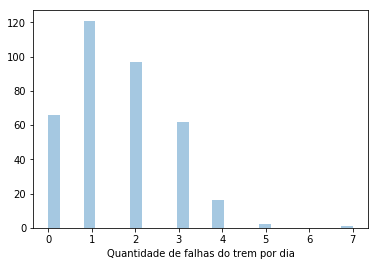

In [12]:
# Definimos os parâmetros para a distribuição (não utilizamos a palavra lambda porque está reservada)
parametro_lambda = 1.5

# Definimos a quantidade de dias em que contamos quantas falhas houve.
dias_contados = 365

# poisson retorna a quantidade de falhas por dia.
samples_poisson = np.random.poisson(lam = parametro_lambda,
                                    size = dias_contados)

# construímos o gráfico
eixo_x = 'Quantidade de falhas do trem por dia'
sns.distplot(samples_poisson, axlabel = eixo_x, kde=False);

In [13]:
samples_poisson[:100]

array([0, 2, 3, 2, 0, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 0, 2, 3, 2, 0, 2, 2,
       3, 0, 2, 3, 1, 2, 2, 1, 1, 4, 0, 1, 1, 3, 1, 2, 3, 1, 1, 0, 3, 1,
       2, 1, 1, 1, 2, 2, 0, 0, 0, 1, 4, 1, 1, 2, 1, 3, 2, 3, 2, 3, 1, 2,
       0, 3, 3, 0, 2, 2, 2, 1, 1, 1, 3, 2, 1, 1, 2, 0, 2, 0, 1, 1, 0, 0,
       2, 4, 1, 3, 3, 3, 1, 1, 3, 1, 1, 1])

In [14]:
samples_poisson.size

365

# Distribuição Exponencial

Esta é uma distribuição que se caracteriza por ter uma função de taxa de falha constante. A distribuição exponencial é a única com esta propriedade. Ela é considerada uma das mais simples em termos matemáticos. Esta distribuição tem sido usada extensivamente como um modelo para o tempo de vida de certos produtos e materiais. Ela descreve adequadamente o tempo de vida de óleos isolantes e dielétricos, entre outros.

De uma forma bastante resumida imagine uma variável aleatória Poisson, onde temos a contagem do número de ocorrências em um intervalo. Suponha agora que estejamos interessados em verificar a probabilidade do tempo transcorrido entre duas ocorrências consecutivas. Essa última é considerada uma variável aleatória exponencial.

Essa distribuição contínua que pode ser utilizada para descrever as probabilidades envolvidas no tempo que decorre para que um determinado evento aconteça. Existe uma conexão muito próxima entre a distribuição exponencial e a de Poisson, de forma que a função exponencial é utilizada para descrever o tempo entre as ocorrências de sucessivos eventos de uma distribuição de Poisson. As relações entre as distribuições podem ser associadas a um processo estocástico, chamado de processo de poisson.

Pode ser representada pela fórmula abaixo, para valores de x >= 0.

\begin{equation*}
f(x;\lambda)= \lambda e^{-\lambda x}
\end{equation*}

### Exemplo

Da mesma forma que acontece na distribuição de Poisson, vamos adotar o parâmetro $\lambda$ que define a frequência de ocorrência do evento igual a 1.5 e os dias contados igual a 365.

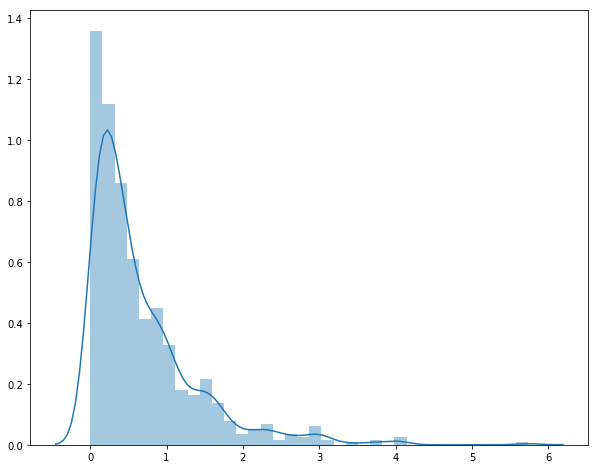

In [15]:
# Nós herdamos o parâmetro lambda e o período de tempo da distribuição anterior ...
parametro_lambda = 1.5
dias_contados = 365

# poisson retorna o número de falhas por dia e a exponencial o tempo para o próximo evento
samples_exp = np.random.exponential(1/parametro_lambda, dias_contados*2)

# por fim, plotamos
plt.figure(figsize=(10,8))
sns.distplot(samples_exp);

In [16]:
samples_exp[:50]

array([0.06432403, 0.81298858, 0.02180816, 0.48553332, 0.86805509,
       1.72925973, 0.1385042 , 1.65663128, 2.57218509, 0.08392517,
       0.45527447, 0.0996438 , 0.83388467, 0.57166367, 0.30023645,
       0.21519215, 0.18277872, 0.43923393, 0.99209421, 0.51903844,
       1.42743677, 0.67122069, 0.86225043, 0.82386889, 0.50442598,
       1.36327102, 0.42925735, 0.19102405, 0.37156131, 0.51796437,
       0.55301114, 2.94767258, 1.54753756, 0.1446645 , 0.7619614 ,
       0.59979427, 2.58725184, 0.55131067, 0.5948827 , 0.03896105,
       0.87738188, 0.66040771, 0.26384483, 0.42408969, 0.2811748 ,
       0.0150414 , 0.41197586, 0.31099128, 0.12501251, 1.42786844])

In [17]:
samples_exp.size

730

# Distribuição Normal

A distribuição normal (ou Guassiana) modela uma grande quantidade de variáveis observadas na natureza, como a estatura ou peso de uma população.

Também sob certas condições, algumas distribuições se comportam como normais, isto é conhecido como o **teorema do limite central**.

É possível ajustar uma distribuição de Poisson a uma normal quando $\lambda$ é um valor de grande magnitude (rodar posteriormente a distribuição Poisson alterando o lambda para algo em torno de 15e dias_contados para em torno de 3000 onde a forma da distribuição ficará parecida com a normal).

Também é possível ajustar uma binomial a uma distribuição normal fazendo-se uma normalização dos dados. Para isso, propõe-se como exemplo agregar o argumento ```fit=stats.norm``` à construção do gráfico.

Dizemos que uma variável aleatória _**X**_ segue uma distribuição normal **_X ~ N ( $\mu$, $\sigma$)_** se sua distribuição de probabilidades estiver dada por:

\begin{equation*}
p(x)= \dfrac{1}{\sqrt{2 \pi \sigma^²}} e^ \dfrac{-(x-\mu)^2}{2 \sigma^2}
\end{equation*}

### Exemplo

Para a definição de uma distribuiç˜åo normal, é necessário estabelecer uma média e um desvio padrão, como as características de uma certa amostra. 

Imaginemos um exemplo em que temos uma população de animais cujo peso segue uma distribuição normal, com $\mu = 342,73 $ kg e $\sigma = 45,78 $ kg

A seguir, vamos usar um conjunto de amostras que vêm de uma distribuição normal, chamando à função ```normal``` do numpy com os parâmetros propostos.

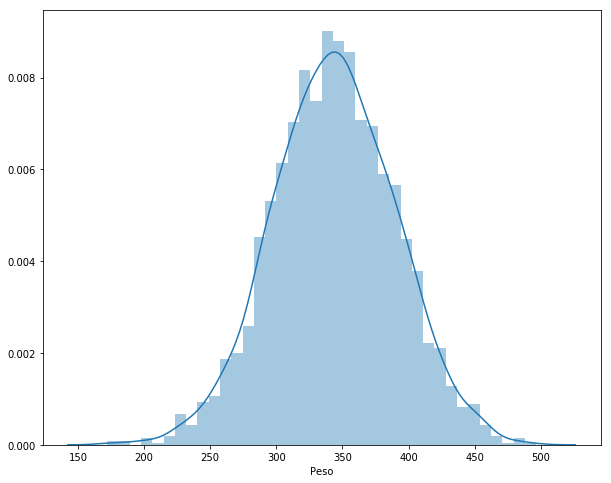

In [18]:
# definimos a média
media = 342.73

# definimos o desvio padrão
desvio_padrão = 45.78

# quantidade de amostras na população
n_amostras = 3000

# chamamos à função normal
samples_normal = np.random.normal(loc = media, 
                                  scale = desvio_padrão, 
                                  size = n_amostras)

# construímos o gráfico
eixo_x = 'Peso'
plt.figure(figsize=(10,8))
sns.distplot(samples_normal, axlabel = eixo_x)
plt.show()

# plt.figure(figsize=(10,8))
# sns.distplot(samples_normal,
#              hist_kws=dict(cumulative=True),
#              kde_kws=dict(cumulative=True))

# plt.show()

## Distribuição normal convergente com o aumento do tamanho da amostra

Utilizando os mesmos valoes para a média (342.73) e o desvio padrão (45.78), vamos variar o tamanho da amostra em 10, 100, 1000, 10000 e 100000 observações, para observar o comportamento da distribuição sendo normalizado, seguido do gráfico da função densidade acumulada.

n: 10


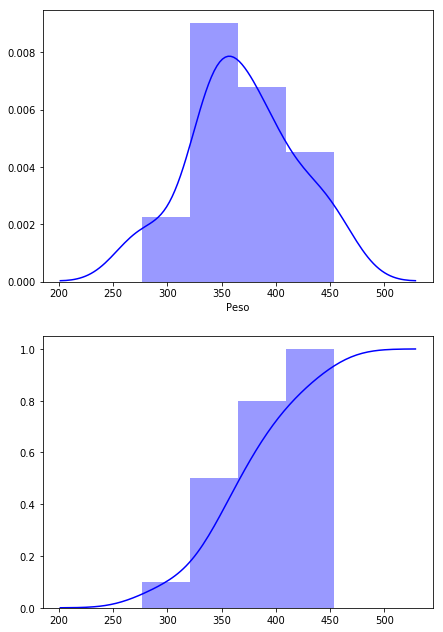

n: 100


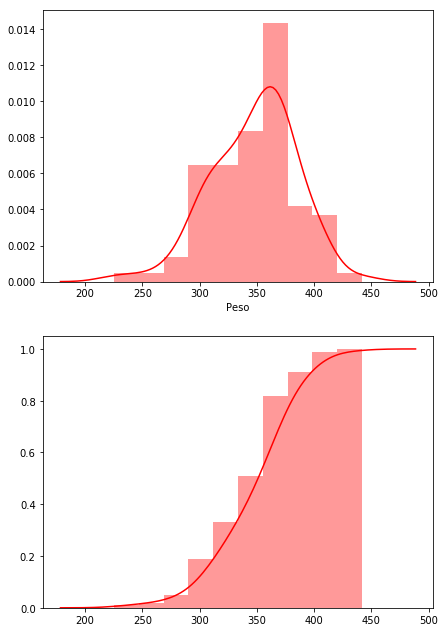

n: 1000


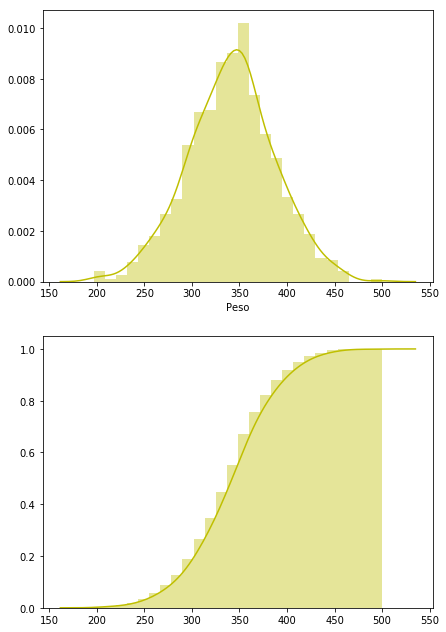

n: 10000


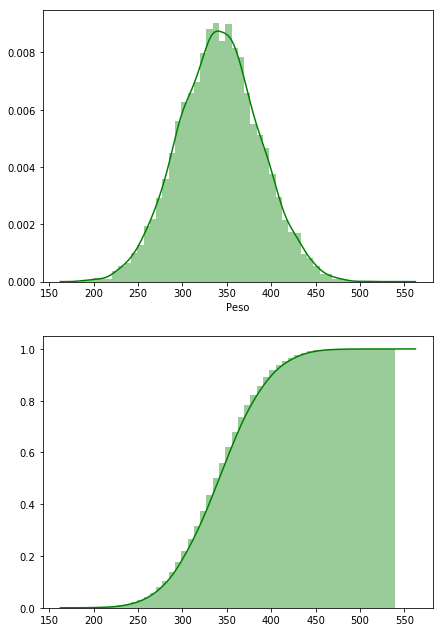

n: 100000


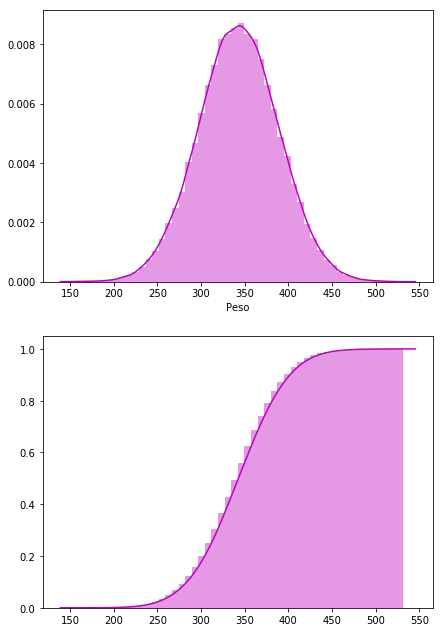

In [19]:
for n, c in [[10,'b'],[100,'r'],[1000,'y'],[10000,'g'],[100000,'m']]:
    print('n:',n)
    
    fig, ax = plt.subplots(2,1,figsize=(7, 11))

    samples_normal = np.random.normal(loc = media,
                                      scale = desvio_padrão,
                                      size = n)
    sns.distplot(samples_normal,
                 axlabel = eixo_x,
                 ax=ax[0],
                 color=c)
    
    sns.distplot(samples_normal,
                 hist_kws=dict(cumulative=True),
                 kde_kws=dict(cumulative=True),
                 ax=ax[1], color=c)
    
    plt.show()

# Distribuição normal padrão

Existe uma infinidade de possibilidade para uma variável X seguir uma distribuição Normal com média $\mu$ e desvio $\sigma$ quaisquer:

$X \sim \mathcal{N}(\mu,\,\sigma^{2})\,$

Uma forma mais fácil de trabalhar com uma distribuição que segue uma normal é tornando-a uma **normal padrão**, e fazemos isso com uma operação bastante simples, basicamente dividindo todos os valores pela média da amostra e dividindo esse resultado pelo desvio padrão da amostra.

Isso faz com que a média seja centrada no zero e o desvio padrão seja o valor 1, e isso vai simplificar muito as contas de agora em diante.

A escala horizontal do gráfico da distribuição normal padrão corresponde ao **Z-Score**, que é uma medida de posição que indica o número de desvios padrão em que um valor se encontra a partir da média. Podemos transformar um valor x em **Z-Score** subtraindo o valor meedio µ e em seguida dividindo-se pelo desvio padrão $\sigma$.

$Z \sim \dfrac{x - \mu} {\sigma^{2}\,} $


**Propriedades da distribuição normal padrão**
- A área acumulada é próxima de 0 para z-scores próximos a z=-3,49.
- A área acumulada aumenta conforme os z-scores aumentam.
- A área acumulada para z=0 é 0,5000.
- A área acumulada é próxima a 1 para z-scores próximos a z=3,49.

In [20]:
# vamos trabalhar com a mesma média e o mesmo desvio padrão (samples_normal.std = 45.71075907280459)
media = 342.73

new_samples_normal = []

samples_normal_std = samples_normal.std()
for row in samples_normal:
    new_value = (row-media)/samples_normal_std
    new_samples_normal.append(new_value)

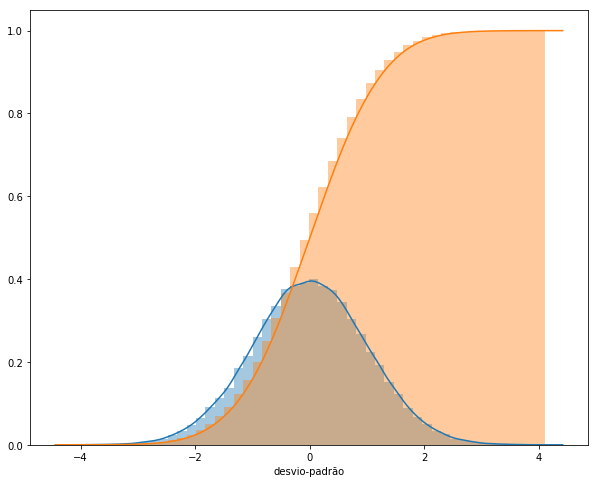

In [21]:
# construímos o gráfico
eixo_x = 'Peso'
plt.figure(figsize=(10,8))
sns.distplot(new_samples_normal, axlabel = 'desvio-padrão')
sns.distplot(new_samples_normal,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

# Z-score

<br>
<br>
\begin{equation*}
Z \sim \dfrac{x - \mu} {\sigma^{2}\,}
\end{equation*}
<br>
<br>

![z-score e suas probabilidades](http://www.portalaction.com.br/sites/default/files/EstatisticaBasica/figuras/distribuicaoNormal/normal3.PNG)

Na estatística, o escore padrão **z-score** é o número fracionário assinado de desvios padrão pelo qual o valor de uma observação ou ponto de dados está acima do valor médio do que está sendo observado ou medido. Valores observados acima da média têm escores padrões positivos, enquanto valores abaixo da média têm escores padrão negativos.

É calculado subtraindo a média populacional de uma pontuação bruta individual e dividindo a diferença pelo desvio padrão da população. É uma quantidade adimensional. Esse processo de conversão é chamado de padronização ou normalização (no entanto, "normalização" pode se referir a muitos tipos de proporções; consulte a normalização para saber mais).

Os escores padrão também são chamados de valores z, escores z, escores normais e variáveis padronizadas. Eles são usados com mais frequência para comparar uma observação a um desvio teórico, como um desvio normal padrão.

A computação de um escore z requer o conhecimento da média e do desvio padrão da população completa à qual um ponto de dados pertence; se alguém tiver apenas uma amostra de observações da população, então o cálculo análogo com média da amostra e desvio padrão da amostra produz a estatística-t.

## Calculando e comparando o z-score

O comportamento da curca normal para o z-score é exatamento o mesmo, em escala diferente - perceba o processo de normalização dos valores nas escalas dos dois gráficos abaixo.

In [37]:
 samples_normal

array([364.0207271 , 323.19753869, 345.66552874, ..., 356.30056358,
       269.83604743, 245.37113503])

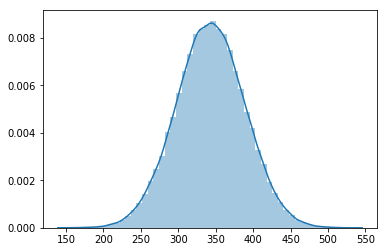

In [35]:
sns.distplot(samples_normal)

In [36]:
from scipy.stats import zscore
zscore(samples_normal)

array([ 0.46101686, -0.42888456,  0.06089336, ...,  0.29272563,
       -1.59210743, -2.1254161 ])

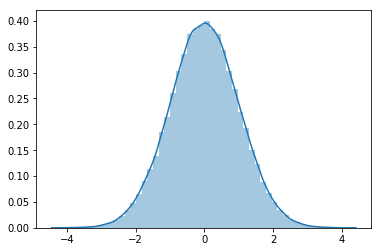

In [39]:
sns.distplot(zscore(samples_normal))

## Cálculo das probabilidades p-value dos valores da distribuição normal com Scipy.Stats

In [23]:
import scipy.stats
scipy.stats.norm(0, 1).cdf(0)

0.5

In [24]:
2 * (scipy.stats.norm(0, 1).cdf(1) - scipy.stats.norm(0, 1).cdf(0))

0.6826894921370859

In [25]:
2 * (scipy.stats.norm(0, 1).cdf(2) - scipy.stats.norm(0, 1).cdf(0))

0.9544997361036416

In [26]:
2 * (scipy.stats.norm(0, 1).cdf(3) - scipy.stats.norm(0, 1).cdf(0))

0.9973002039367398

In [27]:
2 * (scipy.stats.norm(0, 1).cdf(4) - scipy.stats.norm(0, 1).cdf(0))

0.9999366575163338

## Teste de Normalidade

O test shapiro-wilks é um indicador de quão bem os nossos dados se ajustam à distribuição normal.

In [28]:
resultado_poisson = stats.shapiro(samples_uniforme)
resultado_uniforme = stats.shapiro(samples_uniforme)
resultado_binomial = stats.shapiro(samples_binomial)
resultado_normal = stats.shapiro(samples_normal)

print('poisson: ', resultado_poisson)
print('uniforme:', resultado_uniforme)
print('binomial:', resultado_binomial)
print('normal: ', resultado_normal)

poisson:  (0.9065365195274353, 0.0)
uniforme: (0.9065365195274353, 0.0)
binomial: (0.9569217562675476, 0.0)
normal:  (0.9999591112136841, 0.2661116421222687)


## Teste de Kolmogorow-Smirnov

Em estatística, o teste Kolmogorov–Smirnov (também conhecido como teste KS ou teste K–S) é um teste não paramétrico sobre a igualdade de distribuições de probabilidade contínuas e unidimensionais que pode ser usado para comparar uma amostra com uma distribuição de probabilidade de referência (teste K–S uniamostral) ou duas amostras uma com a outra (teste K–S biamostral).Recebe este nome em homenagem aos matemáticos russos Andrei Kolmogorov e Nikolai Smirnov.

A estatística de Kolmogorov–Smirnov quantifica a distância entre a função distribuição empírica da amostra e a função distribuição acumulada da distribuição de referência ou entre as funções distribuição empírica de duas amostras. A distribuição nula desta estatística é calculada sob a hipótese nula de que a amostra é retirada da distribuição de referência (no caso uniamostral) ou de que as amostras são retiradas da mesma distribuição (no caso biamostral). Em cada caso, as distribuições consideradas sob a hipótese nula são distribuições contínuas, mas não restritas.

In [29]:
from scipy.stats import kstest, ks_2samp

kstest(np.random.choice(samples_normal, 500, replace=False), 'norm')
stats.kstest(samples_normal,'norm', alternative = 'greater', mode='asymp')
stats.kstest(samples_normal,'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [30]:
ks_2samp(np.random.choice(samples_normal, 50, replace=False), np.random.choice(samples_normal, 50, replace=True))

Ks_2sampResult(statistic=0.12, pvalue=0.840948046390759)

## Mapa com a origem e relação entre os tipos de distribuição de probabilidade

<br> <br>
![mapa_distribuicoes](http://blog.cloudera.com/wp-content/uploads/2015/12/distribution.png)
<br> <br>